<a href="https://colab.research.google.com/github/nidhishtk/Assignment_11_Text-Mining/blob/main/Q2_Perform_emotion_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
## Perform sentimental analysis:
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [ ]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nPerfect mobile,Mobile is perfect at this rangeOnly issues wit...,26 January 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nGood phone,I bought it for my father and I see it that th...,26 January 2024
3,5.0,"5.0 out of 5 stars\nVery nice one, value for m...","Great photos n videos, long battery life with ...",27 January 2024
4,4.0,4.0 out of 5 stars\nGood function,All is fine. Camera is not great. It's too gra...,25 December 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood budget 5G phone in 15k,I purchased OnePlus phone on Amazon. Delivery ...,11 October 2023
96,5.0,5.0 out of 5 stars\nNice phone,Nice,14 January 2024
97,4.0,4.0 out of 5 stars\nGood phone in low budget d...,"for basic usage Okay, I am not using it, so I ...",28 October 2023
98,5.0,5.0 out of 5 stars\nGood phone,Best in class phone,14 January 2024


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [ ]:
# Importing dataset
from google.colab import files
reviews = files.upload()



reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Saving Amazon_Reviews_Oneplus_Nord_CE2.csv to Amazon_Reviews_Oneplus_Nord_CE2 (1).csv


,Rating,Title,Review,Review_Date
0,1.0,Worst phone ever,Hang problem,25 February 2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022
4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26 February 2022
...,...,...,...,...
4123,1.0,Heating up,Heating up even for moderate use. Heat increas...,21 June 2022
4124,5.0,Over all best,Very Nice,22 June 2022
4125,1.0,Voice cut,All features are good but call cut frequently ...,16 June 2022
4126,4.0,Battery backup is low,As it has fast charging but also drains the ba...,18 June 2022


In [ ]:
reviews.Rating.describe()

count    4128.000000
mean        3.780766
std         1.487904
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

#### Number of Words

In [ ]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Hang problem,2
1,I'm writing this review after using 3days !!!B...,65
2,Camera is so good n very fast phone back look ...,170
3,The media could not be loaded.\n ...,197
4,I got my delivery on 23 feb when I unboxed the...,110


#### Number of characters

In [ ]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Hang problem,12.0
1,I'm writing this review after using 3days !!!B...,383.0
2,Camera is so good n very fast phone back look ...,882.0
3,The media could not be loaded.\n ...,963.0
4,I got my delivery on 23 feb when I unboxed the...,622.0


#### Average Word Length

In [ ]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Hang problem,5.500000
1,I'm writing this review after using 3days !!!B...,4.907692
2,Camera is so good n very fast phone back look ...,4.194118
3,The media could not be loaded.\n ...,4.181319
4,I got my delivery on 23 feb when I unboxed the...,4.663636


#### Number of stopwords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,15
2,Camera is so good n very fast phone back look ...,51
3,The media could not be loaded.\n ...,59
4,I got my delivery on 23 feb when I unboxed the...,48


#### Number of special characters

In [ ]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,0
3,The media could not be loaded.\n ...,0
4,I got my delivery on 23 feb when I unboxed the...,0


#### Number of numerics

In [ ]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,1
3,The media could not be loaded.\n ...,6
4,I got my delivery on 23 feb when I unboxed the...,1


#### Number of Uppercase words

In [ ]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,2
3,The media could not be loaded.\n ...,13
4,I got my delivery on 23 feb when I unboxed the...,3


In [ ]:
print(reviews.columns)


Index(['Rating', 'Title', 'Review', 'Review_Date', 'word_count', 'char_count',
       'avg_word', 'stopwords', 'hashtags', 'numerics', 'upper'],
      dtype='object')


In [ ]:
reviews.drop(['numerics','hashtags','avg_word','char_count','word_count','hashtags','upper'],axis=1,inplace=True)

####  Spelling correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [ ]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                         Sang problem
1    I'm writing this review after using days !!!He...
2    Camera is so good n very fast phone back look ...
3    The media could not be loaded.\n              ...
4    I got my delivery on 23 feb when I unvexed the...
Name: Review, dtype: object

#### As you can see spelling mistake did a mistake of correcting the word Hang into Sang in Context to this review the word 'Hang' fits here and not 'Sang'

In [ ]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       25
1       26
2       25
3       28
4       26
        ..
4123    21
4124    22
4125    16
4126    18
4127    20
Name: Review_Date, Length: 4128, dtype: object 
 0       February
1       February
2       February
3       February
4       February
          ...   
4123        June
4124        June
4125        June
4126        June
4127        June
Name: Review_Date, Length: 4128, dtype: object 
 0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4123    2022
4124    2022
4125    2022
4126    2022
4127    2022
Name: Review_Date, Length: 4128, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [ ]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,25,February,2022
1,26,February,2022
2,25,February,2022
3,28,February,2022
4,26,February,2022
...,...,...,...
4123,21,June,2022
4124,22,June,2022
4125,16,June,2022
4126,18,June,2022


In [ ]:
df.Month.value_counts()

March       1321
April       1183
May          803
June         540
February     281
Name: Month, dtype: int64

### Change 'month' from words to numbers for easier analysis

In [ ]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,2
1,2
2,2
3,2
4,2
...,...
4123,6
4124,6
4125,6
4126,6


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       4128 non-null   float64
 1   Title        4128 non-null   object 
 2   Review       3893 non-null   object 
 3   Review_Date  4128 non-null   object 
 4   stopwords    4128 non-null   int64  
 5   Date         4128 non-null   object 
 6   Month        4128 non-null   int64  
 7   Year         4128 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 258.1+ KB


In [ ]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       4128 non-null   float64
 1   Title        4128 non-null   object 
 2   Review       3893 non-null   object 
 3   Review_Date  4128 non-null   object 
 4   stopwords    4128 non-null   int64  
 5   Date         4128 non-null   int64  
 6   Month        4128 non-null   int64  
 7   Year         4128 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 258.1+ KB


### Dropping the Original Columns after splitting the data

In [ ]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,stopwords,Date,Month,Year
0,1.0,Worst phone ever,Hang problem,0,25,2,2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,15,26,2,2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,51,25,2,2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,59,28,2,2022
4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,48,26,2,2022


In [ ]:
df

,Rating,Title,Review,Review_Date,stopwords,Date,Month,Year
0,1.0,Worst phone ever,Hang problem,25 February 2022,0,25,February,2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022,15,26,February,2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022,51,25,February,2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022,59,28,February,2022
4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26 February 2022,48,26,February,2022
...,...,...,...,...,...,...,...,...
4123,1.0,Heating up,Heating up even for moderate use. Heat increas...,21 June 2022,12,21,June,2022
4124,5.0,Over all best,Very Nice,22 June 2022,0,22,June,2022
4125,1.0,Voice cut,All features are good but call cut frequently ...,16 June 2022,5,16,June,2022
4126,4.0,Battery backup is low,As it has fast charging but also drains the ba...,18 June 2022,5,18,June,2022


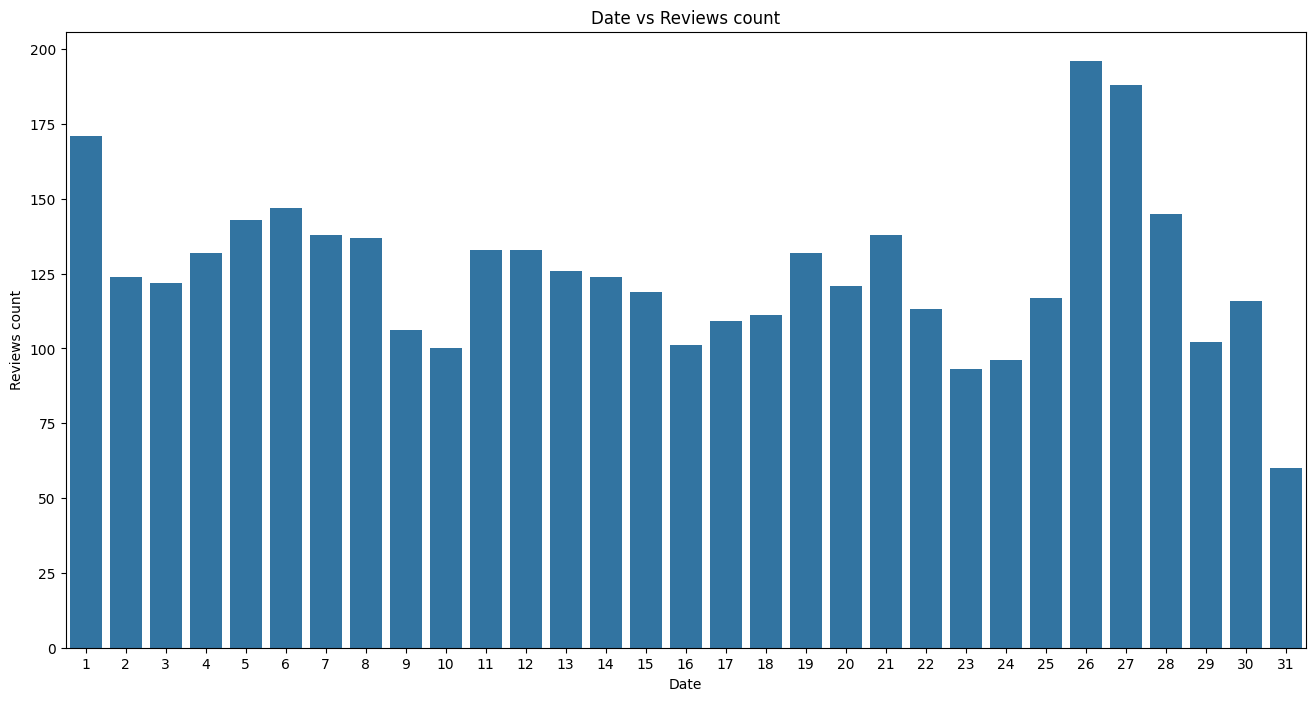

In [ ]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

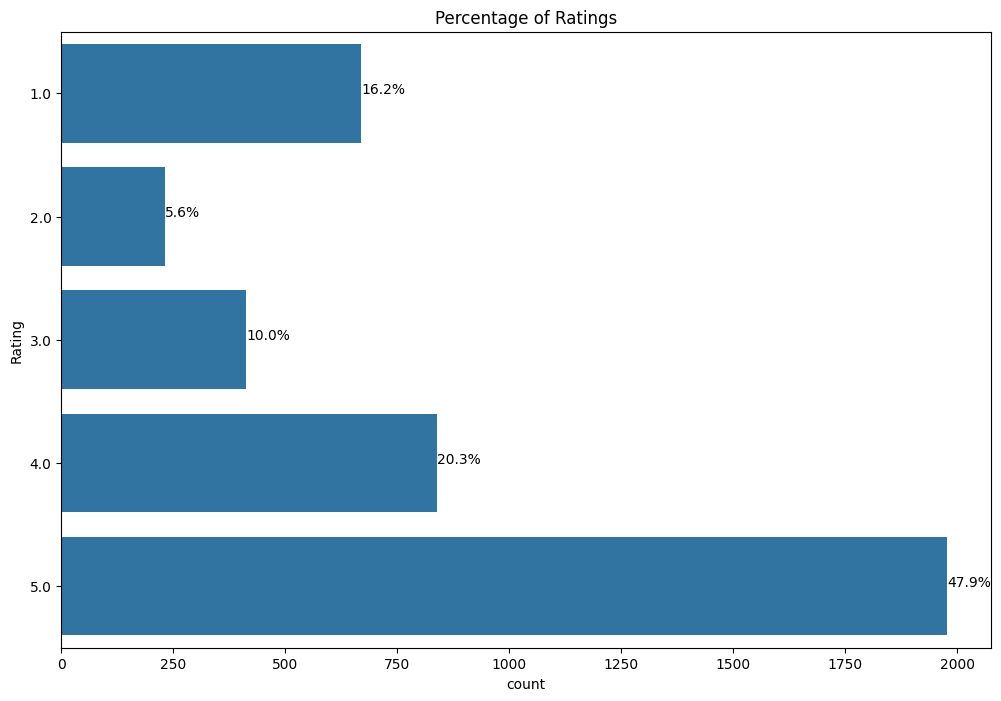

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

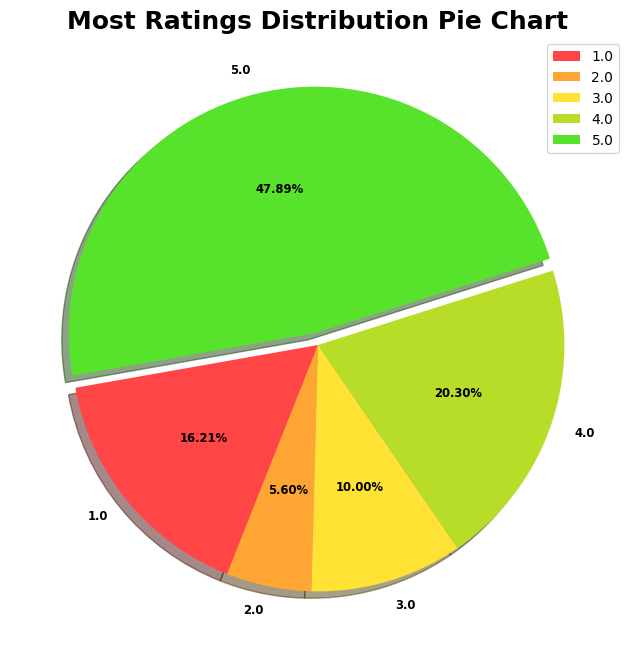

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

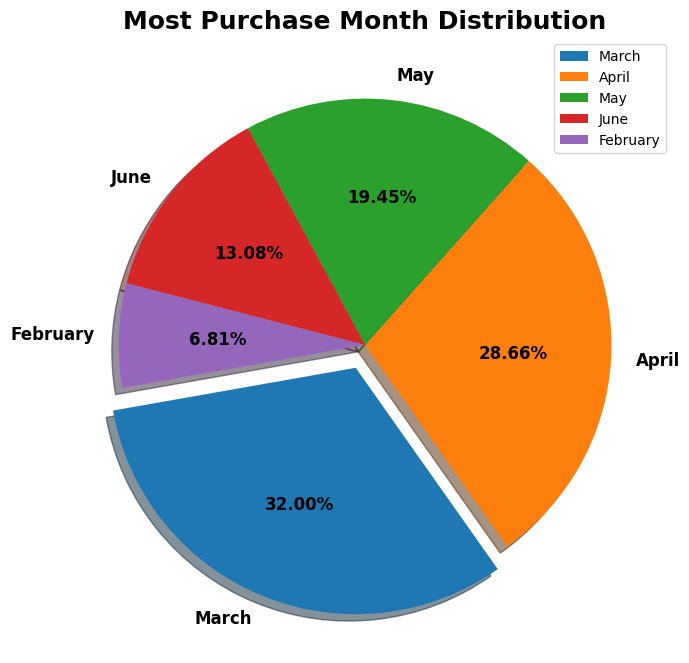

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       explode = [0.1,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

In [ ]:
data = df[['Review']]
data

,Review
0,Hang problem
1,I'm writing this review after using 3days !!!B...
2,Camera is so good n very fast phone back look ...
3,The media could not be loaded.\n ...
4,I got my delivery on 23 feb when I unboxed the...
...,...
4123,Heating up even for moderate use. Heat increas...
4124,Very Nice
4125,All features are good but call cut frequently ...
4126,As it has fast charging but also drains the ba...


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [ ]:
data

,Review
0,hang problem
1,i'm writing review using 3days !!!be honest no...
2,camera good n fast phone back look awesomewith...
3,the media could loaded. it’s a average product...
4,i got delivery 23 feb i unboxed phone display ...
...,...
4123,heating even moderate use. heat increases use ...
4124,very nice
4125,all features good call cut frequently also voi...
4126,as fast charging also drains battery fast.


In [ ]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/4128 [00:00<?, ?it/s]

In [ ]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...


In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [ ]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [ ]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [ ]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [ ]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [ ]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [ ]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,hang problem,Hang problem,"[hang, problem]"
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...,"[writing, review, using, day, honest, normal, ..."
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...,"[camera, good, n, fast, phone, back, look, awe..."
3,medium could loaded average product decent day...,The media could not be loaded.\n ...,"[medium, could, loaded, average, product, dece..."
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...,"[got, delivery, feb, unboxed, phone, display, ..."
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...,"[medium, could, loaded, phone, fab, sometime, ..."
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...,"[nord, ce, decent, choice, someone, looking, u..."
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...,"[phone, good, heating, problem, selfie, good, ..."
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...,"[buy, phone, amazon, really, bad, exp, dislike..."
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...,"[medium, could, loaded, grey, mirror, finish, ..."


In [ ]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [ ]:
from google.colab import files

uploaded_files = files.upload()

file_path = 'stop.txt'
with open(file_path, 'r', encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])


Saving stop.txt to stop (1).txt
a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all


In [ ]:
stop.split(" ")

["a\na's\nable\nabout\nabove\naccording\naccordingly\nacross\nactually\nafter\nafterwards\nagain\nagainst\nain't\nall\nallow\nallows\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\nam\namong\namongst\nan\nand\nanother\nany\nanybody\nanyhow\nanyone\nanything\nanyway\nanyways\nanywhere\napart\nappear\nappreciate\nappropriate\nare\naren't\naround\nas\naside\nask\nasking\nassociated\nat\navailable\naway\nawfully\nb\nbe\nbecame\nbecause\nbecome\nbecomes\nbecoming\nbeen\nbefore\nbeforehand\nbehind\nbeing\nbelieve\nbelow\nbeside\nbesides\nbest\nbetter\nbetween\nbeyond\nboth\nbrief\nbut\nby\nc\nc'mon\nc's\ncame\ncan\ncan't\ncannot\ncant\ncause\ncauses\ncertain\ncertainly\nchanges\nclearly\nco\ncom\ncome\ncomes\nconcerning\nconsequently\nconsider\nconsidering\ncontain\ncontaining\ncontains\ncorresponding\ncould\ncouldn't\ncourse\ncurrently\nd\ndefinitely\ndescribed\ndespite\ndid\ndidn't\ndifferent\ndo\ndoes\ndoesn't\ndoing\ndon't\ndone\ndown\ndownwards\nduring\ne\neach\nedu\neg\neight\n

In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [ ]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['writing', 'review', 'using', 'day', 'honest', 'normal', 'android', 'phoneit', 'like', 'onepluscamera', 'quality', 'low', 'say', 'mp', 'notsound', 'also', 'lowbattery', 'backup', 'ok', 'one', 'day', 'normal', 'use', 'itsif', 'ur', 'gamer', 'go', 'itoverall', 'price', 'high', 'handsetif', 'u', 'really', 'wan', 'na', 'buy', 'oneplus', 'ho', 'higher', 'end', 'modeli', 'first', 'time', 'buying', 'onepluslittle', 'disappointment'])

In [ ]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0                                      [hang, problem]
1    [writing, review, using, day, honest, normal, ...
2    [camera, good, n, fast, phone, back, look, awe...
3    [medium, could, loaded, average, product, dece...
4    [got, delivery, feb, unboxed, phone, display, ...
5    [medium, could, loaded, phone, fab, sometime, ...
6    [nord, ce, decent, choice, someone, looking, u...
7    [phone, good, heating, problem, selfie, good, ...
8    [buy, phone, amazon, really, bad, exp, dislike...
9    [medium, could, loaded, grey, mirror, finish, ...
Name: Clean_Reviews, dtype: object

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [ ]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,hang problem
1,write review use day honest normal android pho...
2,camera good n fast phone back look awesomewith...
3,medium could load averag product decent day da...
4,got deliveri feb unbox phone display damag req...
...,...
4080,heat even moder use heat increas use mobil int...
4081,nice
4082,featur good call cut frequent also voic cut ta...
4083,fast charg also drain batteri fast


In [ ]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,hang problem
1,writing review using day honest normal android...
2,camera good n fast phone back look awesomewith...
3,medium could loaded average product decent day...
4,got delivery feb unboxed phone display damaged...
...,...
4080,heating even moderate use heat increase use mo...
4081,nice
4082,feature good call cut frequently also voice cu...
4083,fast charging also drain battery fast


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [ ]:
print(cv.vocabulary_)

{'hang': 1755, 'problem': 3131, 'writing': 4507, 'review': 3470, 'using': 4275, 'day': 964, 'honest': 1853, 'normal': 2678, 'android': 144, 'phoneit': 2987, 'like': 2259, 'onepluscamera': 2760, 'quality': 3225, 'low': 2335, 'say': 3553, 'mp': 2572, 'notsound': 2689, 'also': 104, 'lowbattery': 2337, 'backup': 308, 'ok': 2728, 'one': 2755, 'use': 4264, 'itsif': 2064, 'ur': 4252, 'gamer': 1584, 'go': 1642, 'itoverall': 2062, 'price': 3113, 'high': 1823, 'handsetif': 1751, 'really': 3314, 'wanna': 4365, 'buy': 568, 'oneplus': 2759, 'ho': 1840, 'higher': 1824, 'end': 1243, 'modeli': 2539, 'first': 1474, 'time': 4095, 'buying': 574, 'onepluslittle': 2766, 'disappointment': 1097, 'camera': 599, 'good': 1648, 'fast': 1397, 'phone': 2974, 'back': 300, 'look': 2309, 'awesomewith': 287, 'dis': 1086, 'segment': 3601, 'worth': 4491, 'important': 1922, 'thing': 4066, 'dedicated': 986, 'memory': 2439, 'card': 633, 'slot': 3741, 'think': 4069, 'plus': 3040, 'cardbattery': 634, 'wit': 4458, 'help': 180

In [ ]:
print(cv.get_feature_names_out()[109:200])


['although' 'aluminium' 'always' 'amaaaazziingg' 'amaze' 'amazed'
 'amazing' 'amazingeverything' 'amazingly' 'amazoing' 'amazon' 'amazonall'
 'amazoncoming' 'amazone' 'amazonthey' 'ambient' 'ambition' 'amd' 'amej'
 'amezing' 'amezon' 'ammount' 'amoled' 'amonth' 'amotions' 'amount'
 'amountdon' 'amountone' 'amozn' 'ample' 'analysis' 'andar' 'ande' 'ander'
 'andorid' 'android' 'androidneed' 'angel' 'angle' 'angry' 'animation'
 'annonce' 'announce' 'announced' 'announcement' 'announces' 'annoyed'
 'annoying' 'another' 'answer' 'answered' 'anybody' 'anymore' 'anyone'
 'anything' 'anytime' 'anyway' 'anywhere' 'aod' 'aor' 'ap' 'apan' 'apart'
 'aperture' 'apk' 'apki' 'app' 'apparently' 'appcamera' 'appear'
 'appearance' 'apperance' 'apple' 'applicable' 'application' 'applied'
 'apply' 'applying' 'appo' 'appreciate' 'appropriate' 'approx'
 'approximately' 'apps' 'appssince' 'appx' 'apr' 'april' 'aprrox' 'apt'
 'apx']


In [ ]:
print(cv.get_feature_names_out()[:100])

['aa' 'aaa' 'aacha' 'aaj' 'aap' 'aapko' 'aawaj' 'aaya' 'aayega' 'aayi'
 'ab' 'abhi' 'abides' 'able' 'abnormal' 'abou' 'absent' 'absolute'
 'absolutely' 'absurd' 'abt' 'accept' 'acceptable' 'accepted' 'accepting'
 'accesories' 'access' 'accessing' 'accessory' 'accha' 'accilent'
 'accommodated' 'accomodate' 'accomplished' 'according' 'accordingbrand'
 'accpet' 'accuracy' 'accurate' 'acha' 'achcha' 'achche' 'achha'
 'achieved' 'act' 'action' 'activation' 'active' 'activity' 'actual'
 'actually' 'ad' 'adapter' 'adaption' 'adaptor' 'add' 'added' 'addicted'
 'adding' 'additional' 'address' 'adequate' 'admit' 'adopted' 'adore'
 'advance' 'advanced' 'advantage' 'advertised' 'advertisement' 'advice'
 'advisor' 'aesthetic' 'afford' 'affordable' 'afterwards' 'agai' 'agar'
 'agent' 'aggregation' 'ago' 'agree' 'ahead' 'ai' 'aince' 'aisa' 'aisi'
 'aitam' 'alag' 'albeit' 'album' 'alert' 'alexa' 'alignment' 'allover'
 'allow' 'allram' 'almost' 'along' 'alot']


In [ ]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4085 [00:00<?, ?it/s]

In [ ]:
corpus[3]

'medium could load averag product decent day day activ one thing would like mention exchang far far alot good amazon like minut deliveri agent good although scratch neglect minor scratch exchang poco pro gb variant exchang rupe bought half year ago sold good price plu point amazoncom back devic would say ok devic camera averag perform fine one plu lose origin oxygen color warp charger vooc charger ye taken oppo wish way believ one plu chang one plu fan want merg brand pleas keep origin maintain thanx amazon hasselfre exchang alot better flipkart'

In [ ]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(4085, 5000)

In [ ]:
cv.get_feature_names_out()[:20]

array(['aa', 'aap', 'ab', 'abl', 'absolut', 'accept', 'access',
       'accessori', 'accha', 'accord', 'accord price', 'accur', 'acha',
       'activ', 'actual', 'ad', 'adapt', 'add', 'addit', 'advantag'],
      dtype=object)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,aa,aap,ab,abl,absolut,accept,access,accessori,accha,accord,...,year batteri,year old,year secur,year secur updat,yellow,yet,youtub,youtub review,yr,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4085 [00:00<?, ?it/s]

In [ ]:
corpus[4]

'got deliveri feb unbox phone display damag request replac new phone technician suppos come inspect instead visit talk call ask instal applic even saw damag display screen let hope amazon right replac phone updat rest later amazon pl consid request replac item soon possibleedit phone perfect replac everyth perfect camera qualiti expect perfectoveral perform bestyou go'

In [ ]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(4085, 5000)

In [ ]:
feature_names = tfidf_v.get_feature_names_out()
print(feature_names[:20])


['aa' 'aap' 'ab' 'abl' 'absolut' 'accept' 'access' 'accessori' 'accha'
 'accord' 'accord price' 'accur' 'acha' 'activ' 'actual' 'ad' 'adapt'
 'add' 'addit' 'advantag']


In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
import pandas as pd

# Assuming tfidf_v is your TfidfVectorizer object and X is the TF-IDF matrix
feature_names = tfidf_v.get_feature_names_out()
count_df = pd.DataFrame(X, columns=feature_names)


In [ ]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'hang problem writing review using day honest normal android phoneit like onepluscamera quality low say mp notsound also lowbattery backup ok one day normal use itsif ur gamer go itoverall price high handsetif u really wanna buy oneplus ho higher end modeli first time buying onepluslittle disappointment camera good n fast phone back look awesomewith dis price segment worth n important thing phone dedicated memory card slot think dis first one plus phone dedicated slot memory cardbattery backup also good n wit help w charger u charge ur phone frm minsit super vooc charger frm dat u charge ur phone fastvery smooth touch n fast phone u play game laginternet connectivity also fast n lightning wit jio sim u c hav pasted one photo showing downloading speed mbps wit cellular networki think everyone want buy dis phone go iti think oneplus launched dis phone lot good feature n important thing price lessi recommendjust go itthank u oneplus n amazon dis wonderful product medium could loaded avera

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[:50]:
    print(token,token.pos_)

hang VERB
problem NOUN
writing VERB
review NOUN
using VERB
day NOUN
honest ADJ
normal ADJ
android PROPN
phoneit NOUN
like ADP
onepluscamera NOUN
quality NOUN
low NOUN
say VERB
mp VERB
notsound ADP
also ADV
lowbattery ADJ
backup NOUN
ok INTJ
one NUM
day NOUN
normal ADJ
use NOUN
itsif VERB
ur PRON
gamer PROPN
go VERB
itoverall PROPN
price NOUN
high PROPN
handsetif PROPN
u PROPN
really ADV
wanna PROPN
buy VERB
oneplus PROPN
ho PROPN
higher ADJ
end NOUN
modeli ADJ
first ADJ
time NOUN
buying VERB
onepluslittle NOUN
disappointment NOUN
camera NOUN
good ADJ
n CCONJ


In [ ]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['poco', 'variant', 'exchanged', 'rupee', 'bought', 'year', 'sold', 'price', 'point', 'amazoncoming', 'device', 'say', 'device', 'camera', 'performance', 'losing', 'originality', 'oxygen', 'color', 'warp', 'charger', 'taken', 'oppo', 'wish', 'way', 'believed', 'change', 'fan', 'want', 'merge', 'brand', 'keep', 'originality', 'maintained', 'thanx', 'exchange', 'alot', 'flipkart', 'got', 'delivery', 'feb', 'phone', 'display', 'damaged', 'requested', 'replacement', 'phone', 'technician', 'suppose', 'come', 'inspection', 'visit', 'talked', 'call', 'asked', 'install', 'application', 'saw', 'damage', 'display', 'screen', 'let', 'hope', 'replace', 'phone', 'update', 'rest', 'consider', 'request', 'replace', 'item', 'possibleedit', 'phone', 'perfect', 'replaced', 'camera', 'quality', 'expected', 'perfectoverall', 'performance', 'go', 'medium', 'loaded', 'phone', 'fab', 'apps', 'crashing', 'think', 'need', 'fix', 'bug', 'oneplus', 'end', 'camera', 'finishing', 'quality', 'effect', 'better', 'lo

In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,1721
1,camera,1204
2,battery,858
3,quality,714
4,charging,357
5,product,354
6,price,309
7,day,299
8,oneplus,263
9,life,258


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

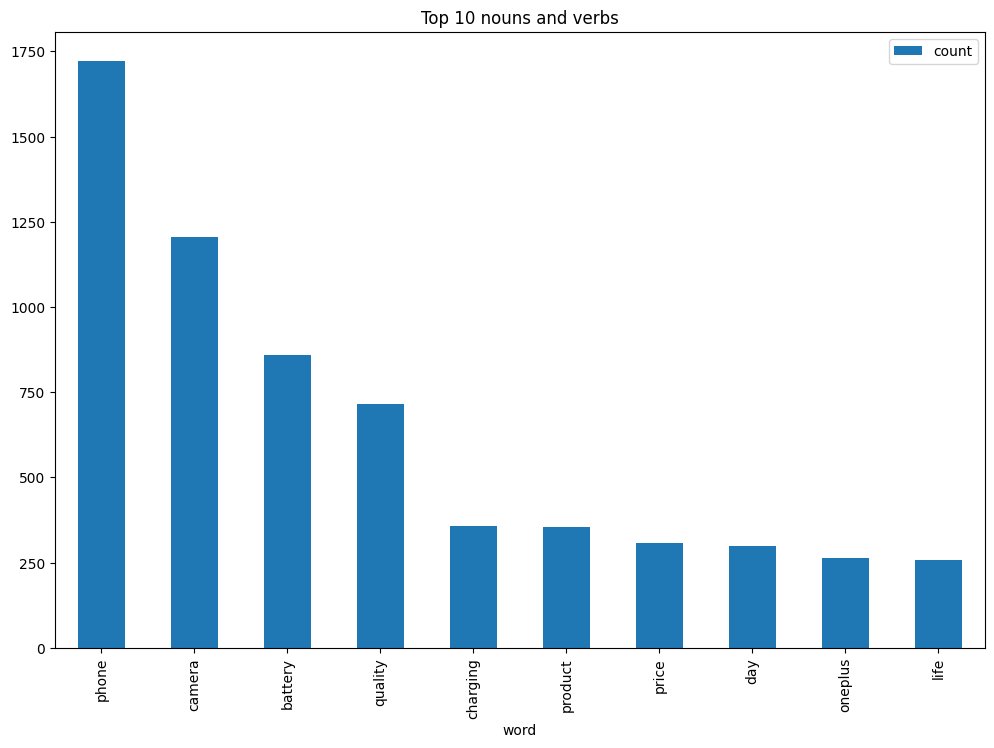

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [ ]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [ ]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [ ]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,3512
neg,573


In [ ]:
dataframe.Clean_Reviews[8]

'buy phone amazon really bad exp dislike k poor build quality configuration real etc coming le k brand buy k audio worst single speaker volume low call end think phone mic issue back camera good phone touch also felt bit lack like fast charging within min charge front cam bit okay battery backup good g band support dual g standby oneplus promise something back camera quality audio improvement update buy offer otherwise go real gt master pro pro plus moto mobile also good using moto year good camera sound took two drawback phone rest okay manageble return policy replacement'

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.147, 'neu': 0.613, 'pos': 0.24, 'compound': 0.8148}

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

if isinstance(X, pd.DataFrame):
    # Check if 'Clean_Reviews' column exists in x
    if 'Clean_Reviews' in x.columns:
        sid = SentimentIntensityAnalyzer()
        sentiment_score = sid.polarity_scores(x['Clean_Reviews'][8])
        print(sentiment_score)
    else:
        print("The 'Clean_Reviews' column does not exist in the DataFrame.")
else:
    print("Variable 'x' is not a DataFrame.")



Variable 'x' is not a DataFrame.


In [ ]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou..."
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co..."
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp..."
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co..."
4,got delivery feb unboxed phone display damaged...,"{'neg': 0.088, 'neu': 0.695, 'pos': 0.217, 'co..."


In [ ]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou...",-0.4019
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co...",0.3818
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.9854
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co...",0.9729
4,got delivery feb unboxed phone display damaged...,"{'neg': 0.088, 'neu': 0.695, 'pos': 0.217, 'co...",0.7845


In [ ]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou...",-0.4019,Negative
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co...",0.3818,Positive
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.9854,Positive
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co...",0.9729,Positive
4,got delivery feb unboxed phone display damaged...,"{'neg': 0.088, 'neu': 0.695, 'pos': 0.217, 'co...",0.7845,Positive
...,...,...,...,...
4080,heating even moderate use heat increase use mo...,"{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp...",0.3182,Positive
4081,nice,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215,Positive
4082,feature good call cut frequently also voice cu...,"{'neg': 0.298, 'neu': 0.496, 'pos': 0.206, 'co...",-0.0772,Negative
4083,fast charging also drain battery fast,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [ ]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

![newplot%20%281%29.png](attachment:newplot%20%281%29.png)

<Axes: xlabel='sentiment', ylabel='count'>

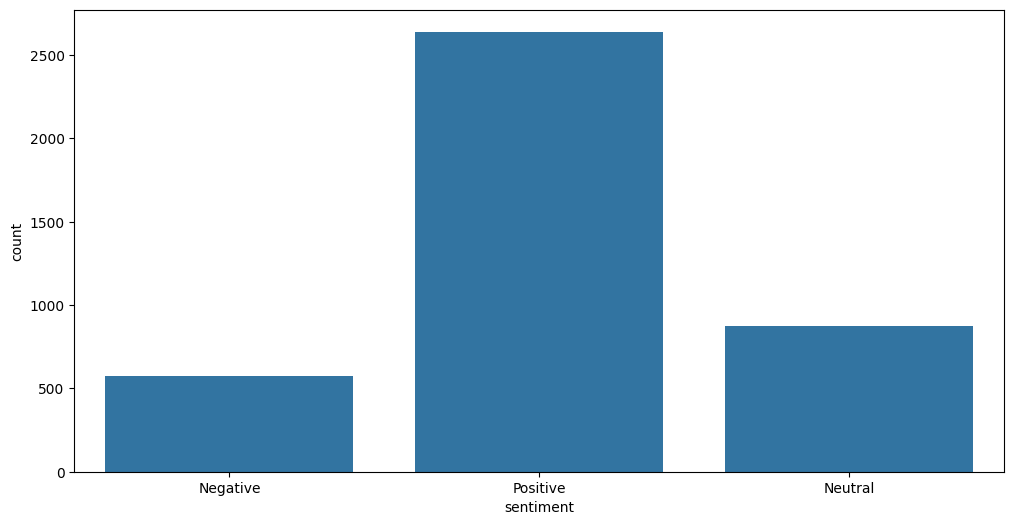

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<ipython-input-195-b3e96d257d7c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

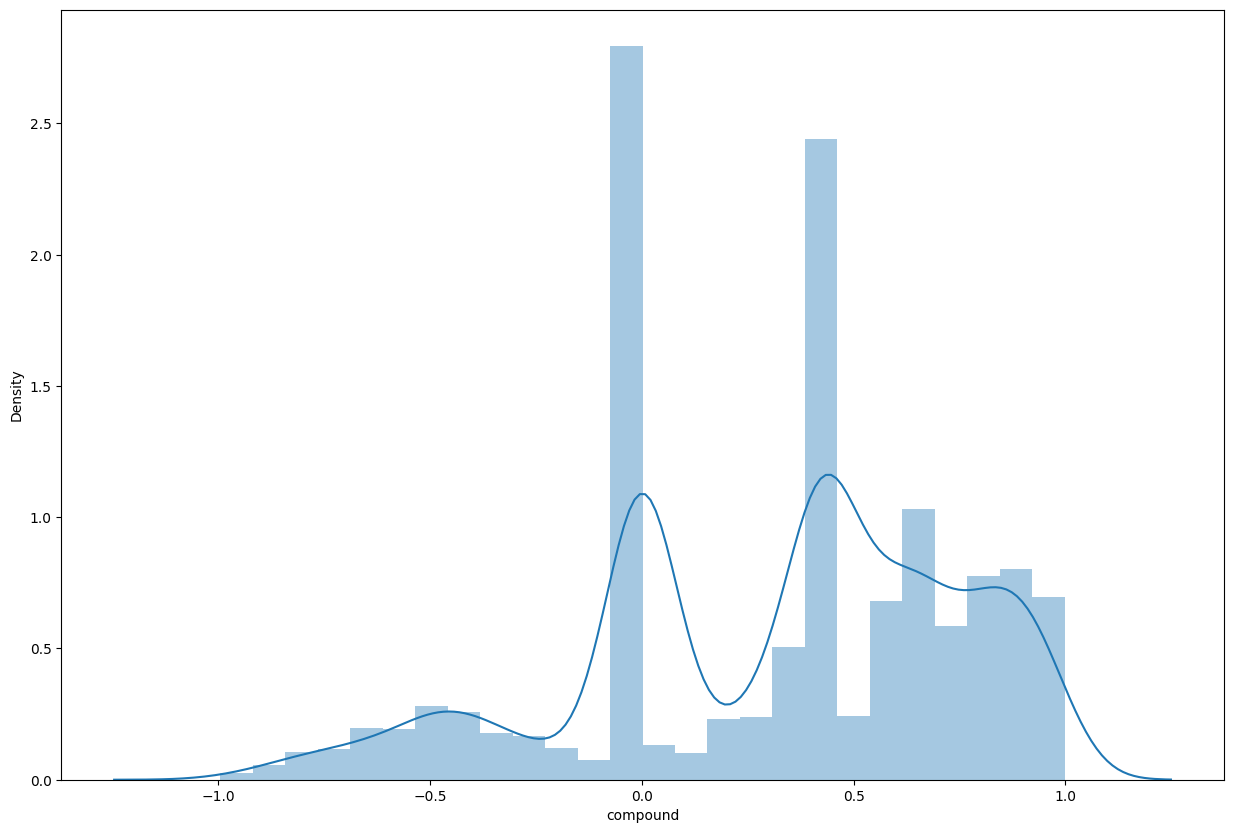

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [ ]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,3607
neg,478


In [ ]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,hang problem,Hang problem,0.000000,0.000000
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...,0.497333,0.166000
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...,0.573333,0.358889
3,medium could loaded average product decent day...,The media could not be loaded.\n ...,0.509524,0.240476
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...,0.565043,0.387013


Text(0, 0.5, 'Subjectivity')

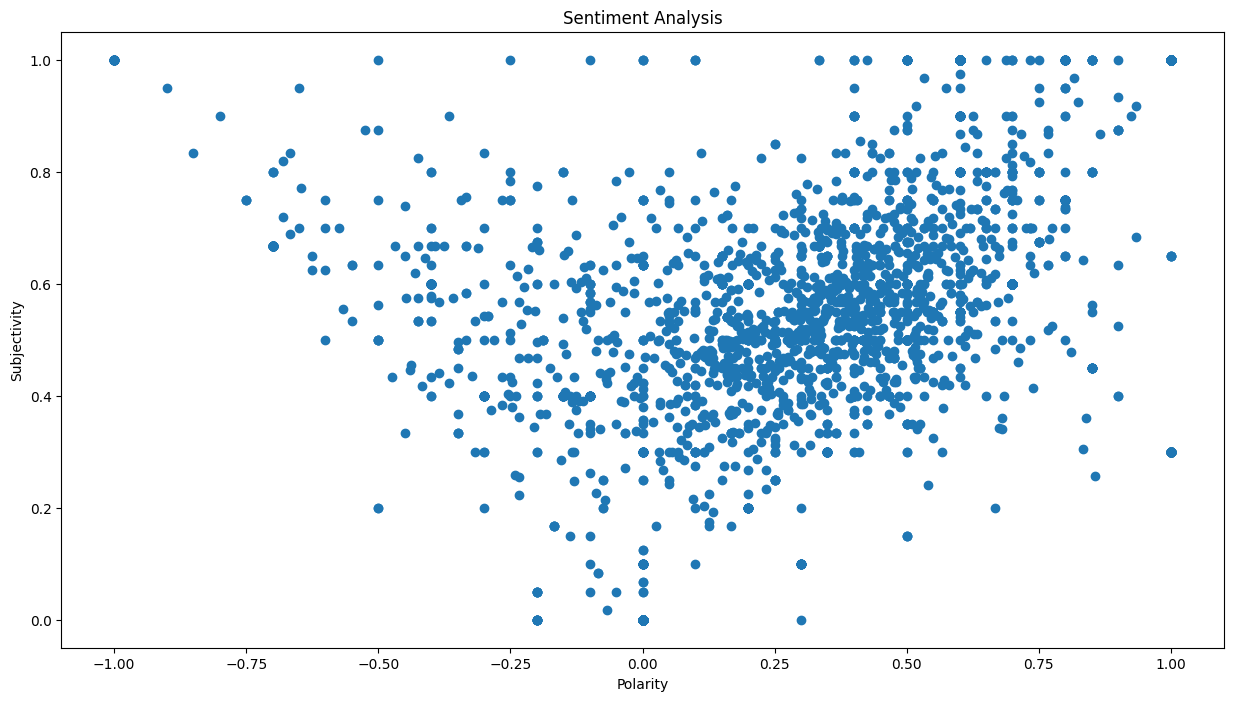

In [ ]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
print(df.columns)


Index(['Review', 'scores', 'compound', 'sentiment'], dtype='object')


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

warnings.filterwarnings("ignore")

# Assuming df is your DataFrame with a 'Review' column
# If df is a NumPy array or a different type, you may need to convert it to a DataFrame first
# df = pd.DataFrame({'Review': your_data})

# Perform sentiment analysis using SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Review'].apply(lambda review: sid.polarity_scores(review)['compound'])

# Create a 'sentiment' column based on Sentiment_Score
df['sentiment'] = pd.cut(df['Sentiment_Score'], bins=[-1, -0.1, 0.1, 1], labels=["Negative", "Neutral", "Positive"])

# Plotting
type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()



In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()